In [ ]:
import os
import cv2
import numpy as np

# **Step 1 : Data Preparation**

In [ ]:
base_path = 'flowers/'

# Image directories
IMG_SIZE = 150
FLOWER_DAISY_DIR = os.path.join(base_path, 'daisy')
FLOWER_SUNFLOWER_DIR = os.path.join(base_path, 'sunflower')
FLOWER_TULIP_DIR = os.path.join(base_path, 'tulip')
FLOWER_DANDI_DIR = os.path.join(base_path, 'dandelion')
FLOWER_ROSE_DIR = os.path.join(base_path, 'rose')

In [ ]:
X = []
Z = []

def assign_label(img, flower_type):
    return flower_type

def make_train_data(flower_type, DIR):
    for img in os.listdir(DIR):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [ ]:
make_train_data('Daisy', FLOWER_DAISY_DIR)
make_train_data('Sunflower', FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip', FLOWER_TULIP_DIR)
make_train_data('Dandelion', FLOWER_DANDI_DIR)
make_train_data('Rose', FLOWER_ROSE_DIR)

print(len(X))

4317


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y, 5)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print(f"x_train shape: {np.array(x_train).shape}")
print(f"y_train shape: {np.array(y_train).shape}")
print(f"x_test shape: {np.array(x_test).shape}")
print(f"y_test shape: {np.array(y_test).shape}")

x_train shape: (3237, 150, 150, 3)
y_train shape: (3237, 5)
x_test shape: (1080, 150, 150, 3)
y_test shape: (1080, 5)


# **Step 2 Selecting a Pre-trained Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# **Step 3 - TensorFlow**

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy

x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE, 3)

x_test = np.array(x_test)
x_test = x_test.reshape(y_test.shape[0], IMG_SIZE, IMG_SIZE, 3)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[CategoricalAccuracy()])

epochs = 20
batch_size = 32
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 51s 486ms/step - categorical_accuracy: 0.6878 - loss: 1.0657 - val_categorical_accuracy: 0.8657 - val_loss: 0.3755
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 475ms/step - categorical_accuracy: 0.9120 - loss: 0.2360 - val_categorical_accuracy: 0.8694 - val_loss: 0.3907
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 475ms/step - categorical_accuracy: 0.9410 - loss: 0.1556 - val_categorical_accuracy: 0.8880 - val_loss: 0.3643
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 476ms/step - categorical_accuracy: 0.9760 - loss: 0.0838 - val_categorical_accuracy: 0.8769 - val_loss: 0.3764
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 476ms/step - categorical_accuracy: 0.9884 - loss: 0.0454 - val_categorical_accuracy: 0.8620 - val_loss: 0.4959
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 48s 476ms/step - categorical_accuracy: 0.9880 - loss: 0.0431 - val_categorical_accuracy: 0.8907 - val_loss: 0.3910
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 49s 479ms/step - categorical_a

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

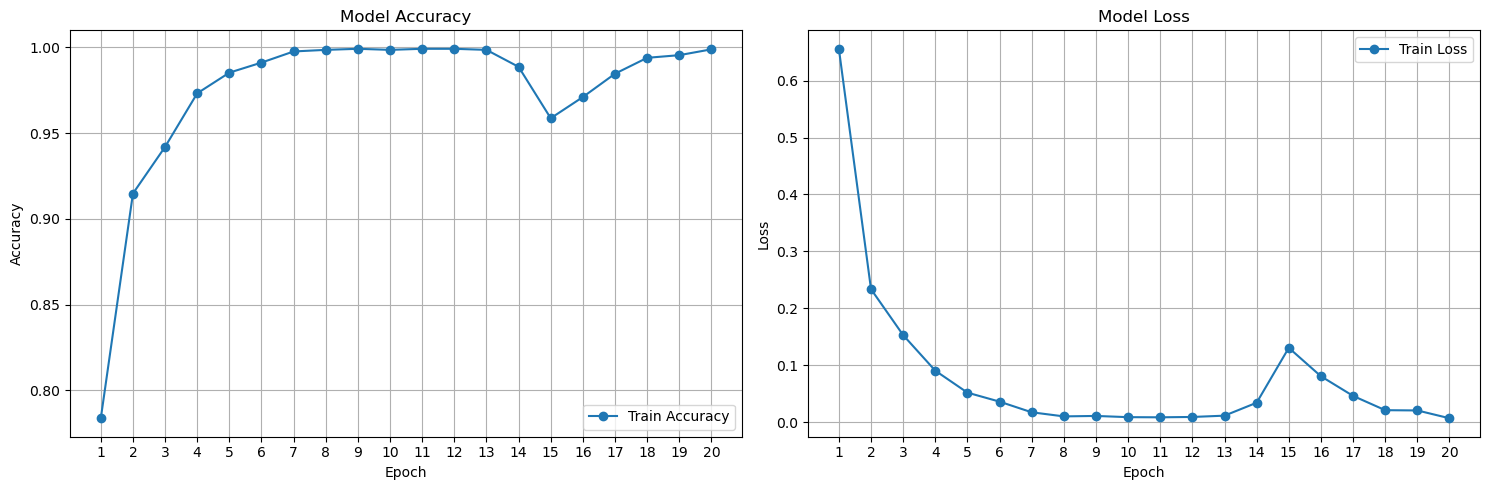

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracy
ax1.plot(history.history['categorical_accuracy'], label='Train Accuracy', marker='o')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')
ax1.set_xticks(range(0, 20))
ax1.set_xticklabels(range(1, 21))
ax1.grid(True)

# Plot training loss
ax2.plot(history.history['loss'], label='Train Loss', marker='o')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.set_xticks(range(0, 20))
ax2.set_xticklabels(range(1, 21))
ax2.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Model evaluation:Tensor Flow (Step 5)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true_classes, y_pred_classes) * 100
precision = precision_score(y_true_classes, y_pred_classes, average='macro') *100
recall = recall_score(y_true_classes, y_pred_classes, average='macro') * 100
f1 = f1_score(y_true_classes, y_pred_classes, average='macro') * 100
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step
Accuracy: 88.80%
Precision: 88.97%
Recall: 88.52%
F1 Score: 88.69%


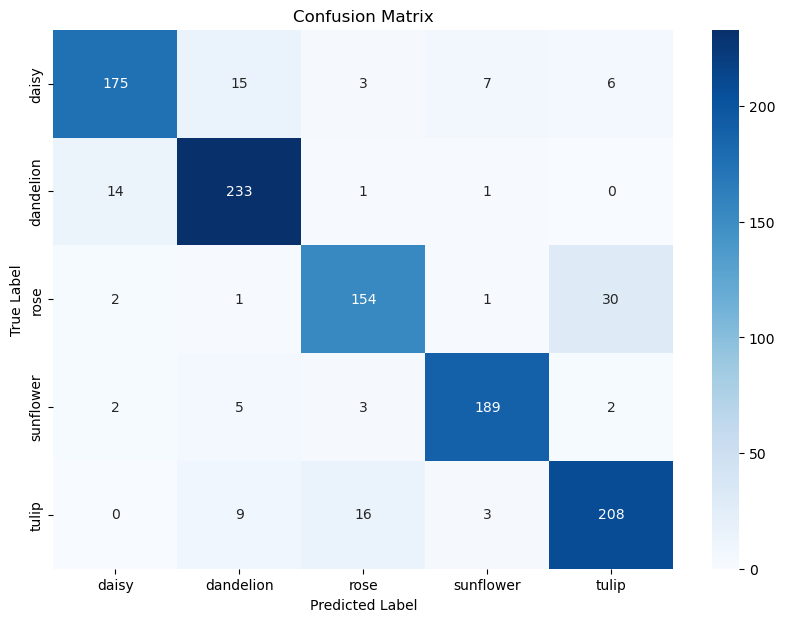

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = ["daisy", "dandelion", "rose", "sunflower", "tulip"]

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# **step 4 : pytorch**

In [ ]:
import torch
import torchvision.models as models
from torch import nn

resnet50 = models.resnet50(pretrained=True)

for param in resnet50.parameters():
    param.requires_grad = False


/Users/manasagudise/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/manasagudise/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_features = resnet50.fc.in_features

resnet50.fc = nn.Sequential(
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 5),
    nn.LogSoftmax(dim=1)
)


In [ ]:
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

criterion = CrossEntropyLoss()

optimizer = Adam(resnet50.fc.parameters(), lr=0.001)


In [ ]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder('flowers/', transform=transform)
train_size = int(0.75 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

import torchmetrics

def train_model(num_epochs=20):
    accuracy = torchmetrics.Accuracy(num_classes=5, average='macro', task='multiclass')

    # Trackers for plotting
    losses = []
    accuracies = []

    resnet50.train()
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = resnet50(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)
            accuracy.update(preds, labels)

        # Average loss across batches
        epoch_loss = total_loss / len(train_loader)
        epoch_accuracy = accuracy.compute()

        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

        accuracy.reset()

        losses.append(epoch_loss)
        accuracies.append(epoch_accuracy)

    return losses, accuracies

losses, accuracies = train_model()



Epoch 1, Loss: 0.7614, Accuracy: 0.7043
Epoch 2, Loss: 0.4987, Accuracy: 0.8109
Epoch 3, Loss: 0.4522, Accuracy: 0.8379
Epoch 4, Loss: 0.4190, Accuracy: 0.8477
Epoch 5, Loss: 0.4183, Accuracy: 0.8473
Epoch 6, Loss: 0.3998, Accuracy: 0.8492
Epoch 7, Loss: 0.3621, Accuracy: 0.8632
Epoch 8, Loss: 0.3718, Accuracy: 0.8621
Epoch 9, Loss: 0.3350, Accuracy: 0.8702
Epoch 10, Loss: 0.3245, Accuracy: 0.8803
Epoch 11, Loss: 0.3085, Accuracy: 0.8806
Epoch 12, Loss: 0.3067, Accuracy: 0.8918
Epoch 13, Loss: 0.2958, Accuracy: 0.8888
Epoch 14, Loss: 0.2877, Accuracy: 0.8881
Epoch 15, Loss: 0.2954, Accuracy: 0.8874
Epoch 16, Loss: 0.2784, Accuracy: 0.8940
Epoch 17, Loss: 0.2858, Accuracy: 0.8915
Epoch 18, Loss: 0.2633, Accuracy: 0.8999
Epoch 19, Loss: 0.2358, Accuracy: 0.9095
Epoch 20, Loss: 0.2581, Accuracy: 0.9030


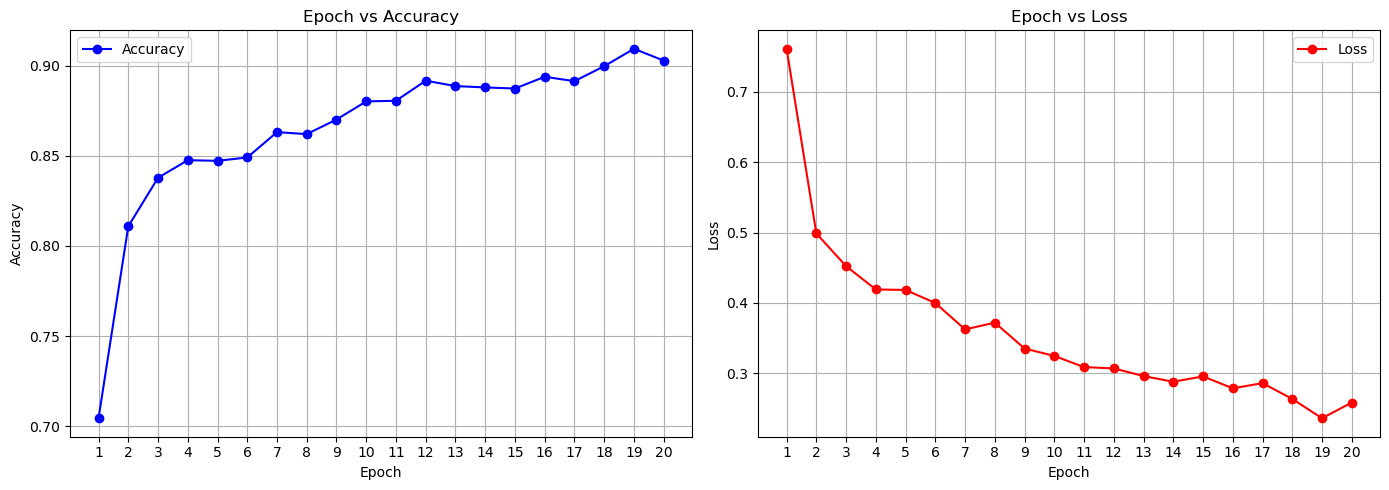

In [ ]:
import matplotlib.pyplot as plt

def plot_training_results(losses, accuracies, num_epochs=20):
    epochs = range(1, num_epochs + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plotting the accuracy
    ax1.plot(epochs, accuracies, 'bo-', label='Accuracy')
    ax1.set_title('Epoch vs Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.set_xticks(epochs)
    ax1.grid(True)

    # Plotting the loss
    ax2.plot(epochs, losses, 'ro-', label='Loss')
    ax2.set_title('Epoch vs Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.set_xticks(epochs)
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_results(losses, accuracies)
9

# Model Evaluation:PyTorch (Step 5)

In [ ]:
import torchmetrics

accuracy = torchmetrics.Accuracy(num_classes=5, average='macro', task='multiclass')
precision = torchmetrics.Precision(num_classes=5, average='macro', task='multiclass')
recall = torchmetrics.Recall(num_classes=5, average='macro', task='multiclass')
f1 = torchmetrics.F1Score(num_classes=5, average='macro', task='multiclass')

resnet50.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = resnet50(images)
        preds = torch.argmax(outputs, dim=1)
        accuracy.update(preds, labels)
        precision.update(preds, labels)
        recall.update(preds, labels)
        f1.update(preds, labels)

print(f'Accuracy: {accuracy.compute()*100:.2f}%')
print(f'Precision: {precision.compute()*100:.2f}%')
print(f'Recall: {recall.compute()*100:.2f}%')
print(f'F1 Score: {f1.compute()*100:.2f}%')

Accuracy: 87.22%
Precision: 87.97%
Recall: 87.22%
F1 Score: 87.39%
